In [19]:
# 여러 개의 엑셀파일을 하나의 리스트에 담기

import pandas as pd
from glob import glob
merged_list = glob('./xls-files/*.xls')

list_table = []
for file_name in merged_list:
    tmp = pd.read_excel(file_name, header=2)
    list_table.append(tmp)
    

total_gas_station = pd.concat(list_table)
print(total_gas_station)

       지역                   상호                      주소      상표         전화번호  \
0   서울특별시             만남의광장주유소    서울 서초구 양재대로12길 73-71  알뜰(ex)  02-573-7430   
1   서울특별시       지에스칼텍스(주)선천주유소   서울 서초구 동작대로 206 (방배동)   GS칼텍스  02-592-4915   
2   서울특별시               신반포주유소    서울 서초구 사평대로 94 (반포동)   SK에너지  02-533-5151   
3   서울특별시   현대오일뱅크(주)직영 팔레스주유소   서울 서초구 사평대로 136 (반포동)  현대오일뱅크  02-720-0020   
4   서울특별시  현대오일뱅크(주)직영 방배현대주유소   서울 서초구 동작대로 182 (방배동)  현대오일뱅크  02-534-0051   
..    ...                  ...                     ...     ...          ...   
26  서울특별시      현대오일뱅크㈜직영 서원주유소    서울 송파구 중대로 154 (가락동)  현대오일뱅크  02-402-5929   
27  서울특별시         대성석유(주)석촌주유소        서울 송파구 백제고분로 289   GS칼텍스  02-421-0051   
28  서울특별시            (주)정직한주유소    서울 송파구 오금로 455 (거여동)  현대오일뱅크  02-406-4634   
29  서울특별시       (주)뉴명성산업 남성주유소  서울 송파구 백제고분로 474 (방이동)  현대오일뱅크  02-423-5128   
30  서울특별시         대신석유(주)진양주유소   서울 송파구 올림픽로 499 (풍납동)   SK에너지  02-477-1906   

   셀프여부 고급휘발유   휘발유    경유  실내등유  
0     Y     -  21

In [23]:
# 여러개의 엑셀파일을 한 개의 엑셀파일로 병합

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter("./xls-files/서울전체주유소가격정보.xlsx", engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object. Turn off the default
# header and index and skip one row to allow us to insert a user defined
# header.
total_gas_station.to_excel(writer, sheet_name='Sheet1', startrow=1, header=False, index=False)

# Get the xlsxwriter workbook and worksheet objects.
workbook = writer.book
worksheet = writer.sheets['Sheet1']

# Get the dimensions of the dataframe.
(max_row, max_col) = total_gas_station.shape

# Create a list of column headers, to use in add_table().
column_settings = []
for header in total_gas_station.columns:
    column_settings.append({'header': header})

# Add the table.
worksheet.add_table(0, 0, max_row, max_col - 1, {'columns': column_settings})

# Make the columns wider for clarity.
worksheet.set_column(0, max_col - 1, 12)

# Close the Pandas Excel writer and output the Excel file.
writer.save()


In [95]:
import pandas as pd
total_gas_station = pd.read_excel('./xls-files/서울전체주유소가격정보.xlsx')
total_gas_station

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,만남의광장주유소,서울 서초구 양재대로12길 73-71,알뜰(ex),02-573-7430,Y,-,2109,2175,-
1,서울특별시,지에스칼텍스(주)선천주유소,서울 서초구 동작대로 206 (방배동),GS칼텍스,02-592-4915,N,2266,2111,2138,-
2,서울특별시,신반포주유소,서울 서초구 사평대로 94 (반포동),SK에너지,02-533-5151,Y,2270,2118,2118,-
3,서울특별시,현대오일뱅크(주)직영 팔레스주유소,서울 서초구 사평대로 136 (반포동),현대오일뱅크,02-720-0020,N,2302,2119,2129,-
4,서울특별시,현대오일뱅크(주)직영 방배현대주유소,서울 서초구 동작대로 182 (방배동),현대오일뱅크,02-534-0051,N,2312,2126,2129,1700
...,...,...,...,...,...,...,...,...,...,...
451,서울특별시,현대오일뱅크㈜직영 서원주유소,서울 송파구 중대로 154 (가락동),현대오일뱅크,02-402-5929,N,2298,2178,2178,1725
452,서울특별시,대성석유(주)석촌주유소,서울 송파구 백제고분로 289,GS칼텍스,02-421-0051,N,2387,2187,2199,1750
453,서울특별시,(주)정직한주유소,서울 송파구 오금로 455 (거여동),현대오일뱅크,02-406-4634,Y,-,2188,2188,-
454,서울특별시,(주)뉴명성산업 남성주유소,서울 송파구 백제고분로 474 (방이동),현대오일뱅크,02-423-5128,N,-,2239,2249,-


In [96]:
# 분석에 필요한 테이블 재구성

gas_station = pd.DataFrame({'주유소명' : total_gas_station['상호'],\
                           '주소' : total_gas_station['주소'],\
                            '휘발유가격' : total_gas_station['휘발유'],\
                            '셀프' : total_gas_station['셀프여부'],\
                            '브랜드' : total_gas_station['상표']\
                           })
gas_station

,주유소명,주소,휘발유가격,셀프,브랜드
0,만남의광장주유소,서울 서초구 양재대로12길 73-71,2109,Y,알뜰(ex)
1,지에스칼텍스(주)선천주유소,서울 서초구 동작대로 206 (방배동),2111,N,GS칼텍스
2,신반포주유소,서울 서초구 사평대로 94 (반포동),2118,Y,SK에너지
3,현대오일뱅크(주)직영 팔레스주유소,서울 서초구 사평대로 136 (반포동),2119,N,현대오일뱅크
4,현대오일뱅크(주)직영 방배현대주유소,서울 서초구 동작대로 182 (방배동),2126,N,현대오일뱅크
...,...,...,...,...,...
451,현대오일뱅크㈜직영 서원주유소,서울 송파구 중대로 154 (가락동),2178,N,현대오일뱅크
452,대성석유(주)석촌주유소,서울 송파구 백제고분로 289,2187,N,GS칼텍스
453,(주)정직한주유소,서울 송파구 오금로 455 (거여동),2188,Y,현대오일뱅크
454,(주)뉴명성산업 남성주유소,서울 송파구 백제고분로 474 (방이동),2239,N,현대오일뱅크


In [97]:
# 구별 분석을 위해 주소에서 구를 별도 추출하여 구성

gas_station['구'] = [eachAddress.split()[1] for eachAddress in gas_station['주소']]
gas_station

,주유소명,주소,휘발유가격,셀프,브랜드,구
0,만남의광장주유소,서울 서초구 양재대로12길 73-71,2109,Y,알뜰(ex),서초구
1,지에스칼텍스(주)선천주유소,서울 서초구 동작대로 206 (방배동),2111,N,GS칼텍스,서초구
2,신반포주유소,서울 서초구 사평대로 94 (반포동),2118,Y,SK에너지,서초구
3,현대오일뱅크(주)직영 팔레스주유소,서울 서초구 사평대로 136 (반포동),2119,N,현대오일뱅크,서초구
4,현대오일뱅크(주)직영 방배현대주유소,서울 서초구 동작대로 182 (방배동),2126,N,현대오일뱅크,서초구
...,...,...,...,...,...,...
451,현대오일뱅크㈜직영 서원주유소,서울 송파구 중대로 154 (가락동),2178,N,현대오일뱅크,송파구
452,대성석유(주)석촌주유소,서울 송파구 백제고분로 289,2187,N,GS칼텍스,송파구
453,(주)정직한주유소,서울 송파구 오금로 455 (거여동),2188,Y,현대오일뱅크,송파구
454,(주)뉴명성산업 남성주유소,서울 송파구 백제고분로 474 (방이동),2239,N,현대오일뱅크,송파구


In [98]:
# 휘발유 가격이 없는 레코드 삭제 (가격에 하이픈 표시된 레코드)
print(gas_station.info())
gas_station = gas_station[gas_station['휘발유가격'] != '-']
gas_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   주유소명    456 non-null    object
 1   주소      456 non-null    object
 2   휘발유가격   456 non-null    object
 3   셀프      456 non-null    object
 4   브랜드     456 non-null    object
 5   구       456 non-null    object
dtypes: object(6)
memory usage: 21.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 455
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   주유소명    447 non-null    object
 1   주소      447 non-null    object
 2   휘발유가격   447 non-null    object
 3   셀프      447 non-null    object
 4   브랜드     447 non-null    object
 5   구       447 non-null    object
dtypes: object(6)
memory usage: 24.4+ KB


In [99]:
# 가격 정보를 실수형으로 변환

gas_station['휘발유가격'] = [float(value) for value in gas_station['휘발유가격']]
gas_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 455
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   주유소명    447 non-null    object 
 1   주소      447 non-null    object 
 2   휘발유가격   447 non-null    float64
 3   셀프      447 non-null    object 
 4   브랜드     447 non-null    object 
 5   구       447 non-null    object 
dtypes: float64(1), object(5)
memory usage: 24.4+ KB


/var/folders/4p/bw62gb3n2vg_2sfnly_20yzw0000gn/T/ipykernel_17893/2501616656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gas_station['휘발유가격'] = [float(value) for value in gas_station['휘발유가격']]


In [100]:
# 1열 인덱스 번호 재지정

gas_station.reset_index(inplace=True)
print(gas_station)

     index                 주유소명                      주소   휘발유가격 셀프     브랜드  \
0        0             만남의광장주유소    서울 서초구 양재대로12길 73-71  2109.0  Y  알뜰(ex)   
1        1       지에스칼텍스(주)선천주유소   서울 서초구 동작대로 206 (방배동)  2111.0  N   GS칼텍스   
2        2               신반포주유소    서울 서초구 사평대로 94 (반포동)  2118.0  Y   SK에너지   
3        3   현대오일뱅크(주)직영 팔레스주유소   서울 서초구 사평대로 136 (반포동)  2119.0  N  현대오일뱅크   
4        4  현대오일뱅크(주)직영 방배현대주유소   서울 서초구 동작대로 182 (방배동)  2126.0  N  현대오일뱅크   
..     ...                  ...                     ...     ... ..     ...   
442    451      현대오일뱅크㈜직영 서원주유소    서울 송파구 중대로 154 (가락동)  2178.0  N  현대오일뱅크   
443    452         대성석유(주)석촌주유소        서울 송파구 백제고분로 289  2187.0  N   GS칼텍스   
444    453            (주)정직한주유소    서울 송파구 오금로 455 (거여동)  2188.0  Y  현대오일뱅크   
445    454       (주)뉴명성산업 남성주유소  서울 송파구 백제고분로 474 (방이동)  2239.0  N  현대오일뱅크   
446    455         대신석유(주)진양주유소   서울 송파구 올림픽로 499 (풍납동)  2298.0  N   SK에너지   

       구  
0    서초구  
1    서초구  
2    서초구  
3    서초구  
4    서초구

In [101]:
# 한글 출력을 위한 폰트 설정 - for MAC

from matplotlib import font_manager, rc # 한글 시각화
rc('font', family='AppleGothic')

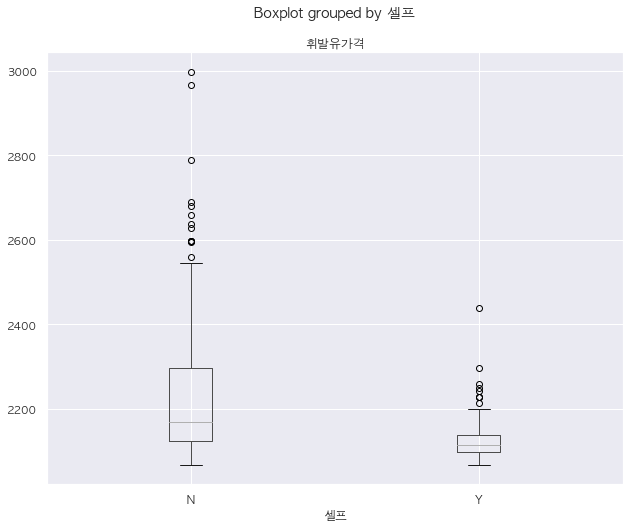

In [102]:
# 시각화 - 셀프 vs 비셀프 가격 비교

import matplotlib.pyplot as plt
gas_station.boxplot(column='휘발유가격', by='셀프')
plt.show()

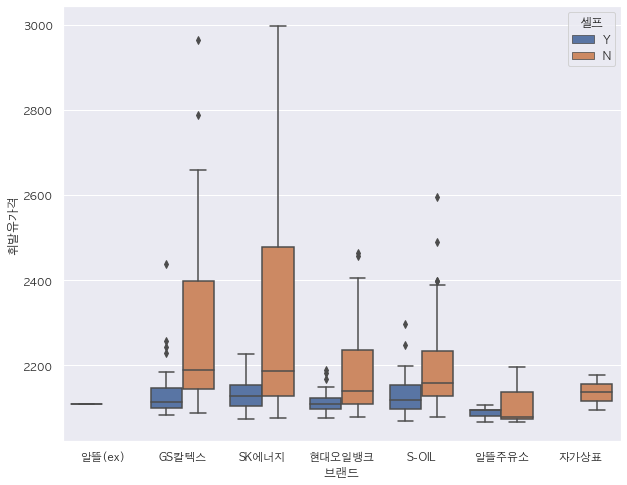

In [103]:
# 시각화 - 브랜드별 가격 분포

import seaborn as sns
sns.boxplot(x='브랜드', y='휘발유가격', hue='셀프', data=gas_station)
plt.show()

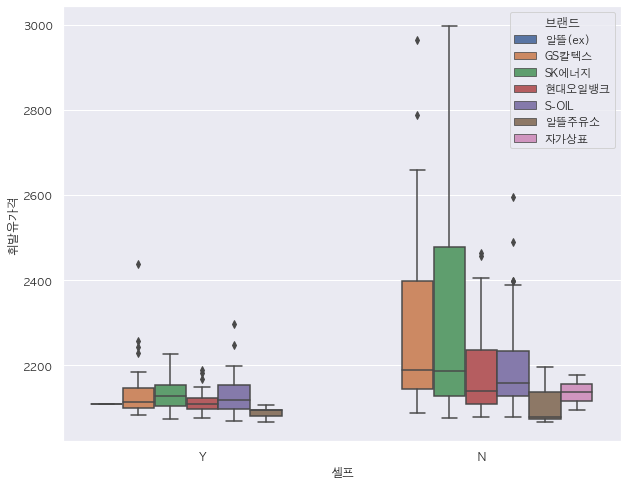

In [104]:
# 시각화 - 브랜드별 셀프 vs 비셀프 가격 비교

sns.boxplot(x='셀프', y='휘발유가격', hue='브랜드', data=gas_station)
plt.show()

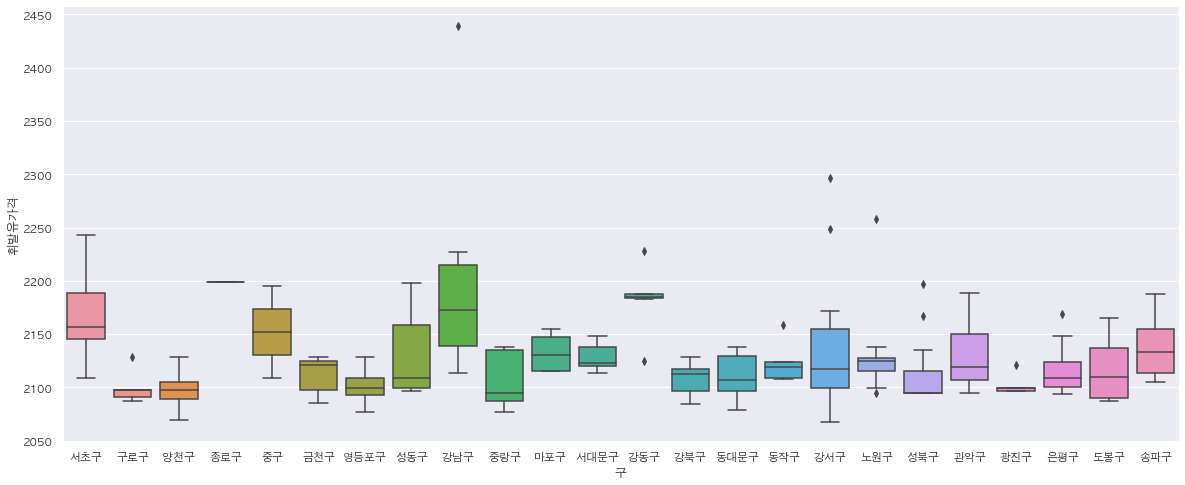

In [108]:
# 시각화 - 셀프 주유소 구별 휘발유 가격 비교

gas_station_only_self = gas_station[gas_station['셀프'] == 'Y']
sns.boxplot(x='구', y='휘발유가격', data=gas_station_only_self)
plt.gcf().set_size_inches(20, 8)
plt.show()

In [109]:
# 서울 지역 최고 가격 통계

gas_station.sort_values(by='휘발유가격', ascending=False).head(10)

,index,주유소명,주소,휘발유가격,셀프,브랜드,구
91,94,서남주유소,서울 중구 통일로 30,2997.0,N,SK에너지,중구
355,361,서계주유소,서울특별시 용산구 청파로 367 (청파동),2965.0,N,GS칼텍스,용산구
90,93,필동주유소,서울 중구 퇴계로 196 (필동2가),2789.0,N,GS칼텍스,중구
354,360,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2690.0,N,SK에너지,용산구
353,359,한석주유소,서울 용산구 이촌로 164,2681.0,N,SK에너지,용산구
89,92,약수주유소,서울 중구 다산로 173,2658.0,N,GS칼텍스,중구
180,185,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2638.0,N,GS칼텍스,강남구
352,358,(주)남경주유소,서울 용산구 녹사평대로11길 24,2628.0,N,SK에너지,용산구
48,49,구로주유소,서울 구로구 구로동로 137 (구로동),2598.0,N,GS칼텍스,구로구
88,91,신당동주유소,서울 중구 다산로 242 (신당동),2598.0,N,SK에너지,중구


In [110]:
# 서울 지역 최저 가격 통계

gas_station.sort_values(by='휘발유가격', ascending=True).head(10)

,index,주유소명,주소,휘발유가격,셀프,브랜드,구
273,279,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2068.0,N,알뜰주유소,강서구
274,280,화곡역주유소,서울 강서구 강서로 154 (화곡동),2068.0,Y,알뜰주유소,강서구
49,51,현대주유소,서울 양천구 남부순환로 372 (신월동),2069.0,Y,S-OIL,양천구
50,52,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),2074.0,Y,SK에너지,양천구
181,186,오천만주유소,서울 중랑구 동일로 547 (면목동),2077.0,Y,S-OIL,중랑구
52,54,가로공원주유소,서울 양천구 가로공원로 165 (신월동),2077.0,N,SK에너지,양천구
51,53,현대오일뱅크(주)직영 양천현대셀프주유소,서울 양천구 안양천로 1179 (목동),2077.0,Y,현대오일뱅크,양천구
103,107,도림주유소,서울 영등포구 도림로 343 (도림동),2077.0,Y,알뜰주유소,영등포구
320,326,원천주유소,서울 성북구 돌곶이로 142 (장위동),2078.0,N,알뜰주유소,성북구
53,55,형산석유(주)원주유소,서울 양천구 남부순환로 408,2079.0,N,현대오일뱅크,양천구
